In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import numpy as np
import matplotlib.pyplot as plt

In [2]:
class NN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NN,self).__init__()
        self.fc1 = nn.Linear(input_size, 50)
        self.fc2 = nn.Linear(50, num_classes)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [4]:
input_size = 1
num_classes = 1
learning_rate = 0.001
batch_size = 64
num_epochs = 100

In [104]:
x = np.linspace(-1,1,50)
x = x.reshape(50,1)
x = torch.from_numpy(x)
data_test = x**3

x_test = np.linspace(-1,1,500)
x_test = x_test.reshape(500,1)
np.random.shuffle(x_test)
x_test = torch.from_numpy(x_test)
data_train = x_test**3
train_loader = (x_test, data_train)

In [118]:
model = NN(input_size=input_size, num_classes=num_classes).to(device)


In [144]:

gradients = []
for p in model.parameters():
    gradients.append(p.grad.view(-1).numpy())
    
print(gradients)

[array([ 0.0000000e+00,  0.0000000e+00,  4.6070836e-06,  1.8207498e-06,
        1.4160645e-06,  4.2056007e-07,  0.0000000e+00,  0.0000000e+00,
        9.6774908e-09, -1.1017859e-06,  0.0000000e+00,  0.0000000e+00,
       -8.3258789e-07,  9.6876681e-07,  0.0000000e+00,  6.7613166e-07,
        0.0000000e+00, -1.0562250e-06,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00,  8.8776500e-07, -6.1134921e-07,
       -2.7299697e-07, -4.5923198e-07, -1.1110777e-06, -1.5178691e-06,
        7.4668037e-07,  2.6946359e-06,  1.2189823e-06,  2.1249003e-08,
       -4.4170133e-07,  0.0000000e+00,  2.3323907e-06, -1.0163091e-06,
        0.0000000e+00,  0.0000000e+00,  2.1020514e-07,  0.0000000e+00,
        2.5270390e-07,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        6.7962532e-07,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
        0.0000000e+00, -1.8476010e-08], dtype=float32), array([ 0.0000000e+00,  0.0000000e+00, -5.6703157e-06,  2.4241997e-06,
       -4.5232173e-0

In [119]:
# Define the loss function
def loss_fn(output, target):
    return torch.mean((output - target) ** 2)

optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [129]:
# Train the network
for epoch in range(10000):
    optimizer.zero_grad()
    y_pred = model(x_test.float())
    y_pred = y_pred**3
    loss = loss_fn(y_pred, data_train.float())
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 0:
        print(f'Epoch {epoch}: Loss = {loss.item():.4f}')

Epoch 0: Loss = 0.0746
Epoch 1000: Loss = 0.0000
Epoch 2000: Loss = 0.0000
Epoch 3000: Loss = 0.0000
Epoch 4000: Loss = 0.0000
Epoch 5000: Loss = 0.0000
Epoch 6000: Loss = 0.0000
Epoch 7000: Loss = 0.0000
Epoch 8000: Loss = 0.0000
Epoch 9000: Loss = 0.0000


In [39]:
for epoch in range(num_epochs):
    for i in range(len(data_train)):
        #Gat data to cuda if possible
        targets = data_train[i]
        
        # forward
        scores = model(x_test[i].float())
        scores = scores**3
        loss = loss_fn(scores, targets.float())
        
        # backward prop
        optimizer.zero_grad()
        loss.backward()
        
        # gradient descent or adam step
        optimizer.step()
        
        if epoch % 10 == 0 and i == 0:
            print(f'Epoch {epoch}: Loss = {loss.item():.4f}')

Epoch 0: Loss = 0.0015
Epoch 10: Loss = 0.0003
Epoch 20: Loss = 0.0002
Epoch 30: Loss = 0.0002
Epoch 40: Loss = 0.0002
Epoch 50: Loss = 0.0002
Epoch 60: Loss = 0.0002
Epoch 70: Loss = 0.0001
Epoch 80: Loss = 0.0001
Epoch 90: Loss = 0.0001


In [130]:
y_test = model(x.float())

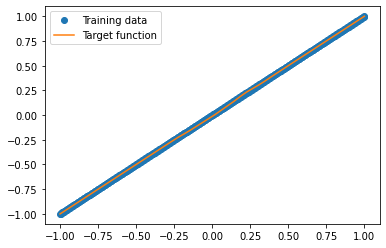

In [131]:
# Plot the results
plt.plot(x_test.detach().numpy(), x_test.detach().numpy(), 'o', label='Training data')
plt.plot(x.detach().numpy(), y_test.detach().numpy(), label='Target function')
plt.legend()
plt.show()